# **Customer Conversion Prediction**

This notebook is using Audio Books App. customer conversion data. The goal of this notebook is to create classification model that can predicts whether the customer will buy again or not.

This notebook is a continuation of previous notebook (EDA and baseline modelling `customer_conversion_baseline.ipynb`)

In [ ]:
## dependencies
# !pip install scikit-learn==0.23.2
# !pip install pycaret

## Libraries

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Import Dataset

In [ ]:
conversion = pd.read_csv('/content/drive/MyDrive/Course_Data/Audiobooks_data.csv',
              names = ['id', 'book_length_avg', 'book_length_overall', 'price_avg', 'price_overall', 'review', 'review_10/10', 'completion', 'minute_listened',
                       'support_req', 'last_visit_minus_purchase', 'target']) 

In [ ]:
conversion.head()

,id,book_length_avg,book_length_overall,price_avg,price_overall,review,review_10/10,completion,minute_listened,support_req,last_visit_minus_purchase,target
0,873,2160.0,2160,10.13,10.13,0,8.91,0.0,0.0,0,0,1
1,611,1404.0,2808,6.66,13.33,1,6.50,0.0,0.0,0,182,1
2,705,324.0,324,10.13,10.13,1,9.00,0.0,0.0,1,334,1
3,391,1620.0,1620,15.31,15.31,0,9.00,0.0,0.0,0,183,1
4,819,432.0,1296,7.11,21.33,1,9.00,0.0,0.0,0,0,1


## Preprocess (Oversampling)

Since our "1" labeled data is < 10000 samples, we'll try to use oversampling.

In [ ]:
#initiate smote
smote = SMOTE(random_state = 42)

In [ ]:
#define features and target
features = conversion.drop(columns = ['id', 'target'])
target = conversion['target']
features.head()

,book_length_avg,book_length_overall,price_avg,price_overall,review,review_10/10,completion,minute_listened,support_req,last_visit_minus_purchase
0,2160.0,2160,10.13,10.13,0,8.91,0.0,0.0,0,0
1,1404.0,2808,6.66,13.33,1,6.50,0.0,0.0,0,182
2,324.0,324,10.13,10.13,1,9.00,0.0,0.0,1,334
3,1620.0,1620,15.31,15.31,0,9.00,0.0,0.0,0,183
4,432.0,1296,7.11,21.33,1,9.00,0.0,0.0,0,0


In [ ]:
#fit transform oversampler
X, y = smote.fit_resample(features, target)

In [ ]:
#check shape before and after
features.shape, X.shape

((14084, 10), (23694, 10))

In [ ]:
#check target count before and after
target.value_counts(), y.value_counts()

(0    11847
 1     2237
 Name: target, dtype: int64, 1    11847
 0    11847
 Name: target, dtype: int64)

In [ ]:
#buld new dataframe
df = X.copy()
df['target'] = y
df.head()

,book_length_avg,book_length_overall,price_avg,price_overall,review,review_10/10,completion,minute_listened,support_req,last_visit_minus_purchase,target
0,2160.0,2160,10.13,10.13,0,8.91,0.0,0.0,0,0,1
1,1404.0,2808,6.66,13.33,1,6.50,0.0,0.0,0,182,1
2,324.0,324,10.13,10.13,1,9.00,0.0,0.0,1,334,1
3,1620.0,1620,15.31,15.31,0,9.00,0.0,0.0,0,183,1
4,432.0,1296,7.11,21.33,1,9.00,0.0,0.0,0,0,1


In [ ]:
#check new dataset 'completion'
df[df['target'] == 1]['completion'].describe()

count    11847.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: completion, dtype: float64

There is no change in completion after oversampled

## Model Building
According to previous training result, LightGBM will be used for this case

In [ ]:
#setup clf
clf = setup(data = df, target = 'target', use_gpu = True)

,Description,Value
0,session_id,2744
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(23694, 11)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
#build lightgbm
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8843,0.9654,0.8446,0.9175,0.8795,0.7685,0.7710
1,0.8529,0.9497,0.7976,0.8970,0.8444,0.7059,0.7102
2,0.8656,0.9520,0.8169,0.9052,0.8588,0.7312,0.7347
3,0.8794,0.9580,0.8313,0.9200,0.8734,0.7589,0.7625
4,0.8632,0.9553,0.8048,0.9113,0.8548,0.7264,0.7314
5,0.8782,0.9589,0.8251,0.9231,0.8713,0.7563,0.7606
6,0.8733,0.9552,0.8275,0.9110,0.8673,0.7467,0.7498
7,0.8649,0.9527,0.8215,0.8996,0.8588,0.7298,0.7326
8,0.8667,0.9544,0.8034,0.9199,0.8577,0.7334,0.7394
9,0.8721,0.9556,0.8215,0.9141,0.8653,0.7443,0.7481


In [ ]:
#current lgbm hyperparameter
lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2744, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
#model auto-tuning, aiming for F1
tuned_lgbm = tune_model(lgbm, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8674,0.9520,0.7952,0.9296,0.8571,0.7348,0.7426
1,0.8529,0.9394,0.7711,0.9222,0.8399,0.7059,0.7156
2,0.8487,0.9416,0.7795,0.9049,0.8375,0.6974,0.7042
3,0.8614,0.9471,0.7964,0.9155,0.8518,0.7227,0.7290
4,0.8499,0.9442,0.7735,0.9132,0.8376,0.6998,0.7082
5,0.8619,0.9506,0.7901,0.9225,0.8512,0.7238,0.7313
6,0.8625,0.9507,0.7853,0.9287,0.8510,0.7250,0.7338
7,0.8607,0.9466,0.7913,0.9188,0.8503,0.7214,0.7284
8,0.8565,0.9456,0.7793,0.9215,0.8444,0.7129,0.7216
9,0.8498,0.9451,0.7708,0.9155,0.8369,0.6996,0.7085


In [ ]:
#auto-tuned paramater
tuned_lgbm

LGBMClassifier(bagging_fraction=0.7, bagging_freq=0, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.005, max_depth=-1,
               min_child_samples=56, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=160, n_jobs=-1, num_leaves=100, objective=None,
               random_state=2744, reg_alpha=0.4, reg_lambda=0.05, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
#user-defined tuning
my_lgbm = create_model('lightgbm', n_estimators = 200, max_depth = 5, num_leaves = 30, learning_rate = 0.01, max_bin = 300)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8529,0.9370,0.8313,0.8690,0.8498,0.7059,0.7065
1,0.8210,0.9243,0.7916,0.8412,0.8156,0.6420,0.6431
2,0.8282,0.9205,0.7976,0.8498,0.8229,0.6564,0.6577
3,0.8391,0.9315,0.8133,0.8577,0.8349,0.6781,0.6790
4,0.8228,0.9223,0.7747,0.8573,0.8139,0.6456,0.6486
5,0.8420,0.9308,0.8034,0.8706,0.8356,0.6840,0.6860
6,0.8390,0.9317,0.8094,0.8603,0.8341,0.6779,0.6791
7,0.8257,0.9266,0.7949,0.8470,0.8202,0.6514,0.6526
8,0.8275,0.9233,0.7841,0.8587,0.8197,0.6550,0.6575
9,0.8088,0.9138,0.7636,0.8395,0.7997,0.6176,0.6202


As we can see, the best model is the base model with the "untuned" hyperparams 😀

## Model Evaluation

### Learning Curve

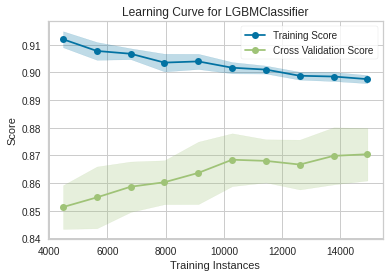

In [ ]:
#learning curve of base model
plot_model(lgbm, plot = 'learning')

The model seems overfit 😞

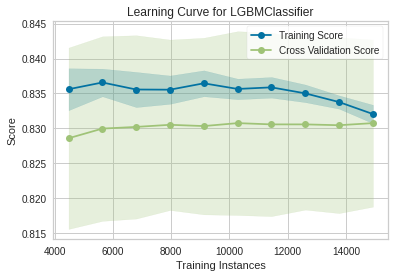

In [ ]:
#learning curve of my-tuned models
plot_model(my_lgbm, plot = 'learning')

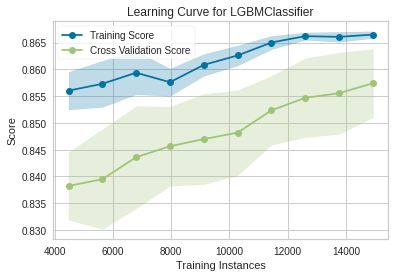

In [ ]:
#learning curve of auto-tuned models
plot_model(tuned_lgbm, plot = 'learning')

From the learning curve, we can see that `the base model` seems overfit, but the val_score is also high, meanwhile the train_score is very-high. For the other 2 models, `my-tuned model` seems very generalized which is good, but the std of val_score is very high, `the auto-tuned` model seems pretty generalized and the score is increasing as the training instance increase.

### 

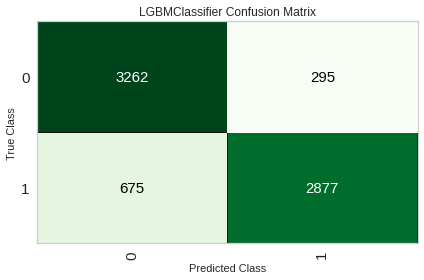

In [ ]:
#confusion matrix of base model
plot_model(lgbm, plot = 'confusion_matrix')

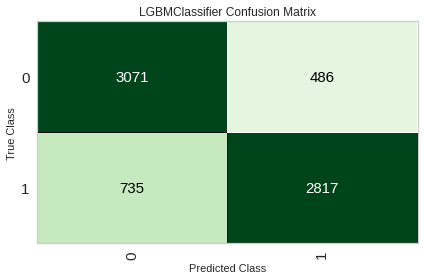

In [ ]:
#confusion matrix of my-tuned model
plot_model(my_lgbm, plot = 'confusion_matrix')

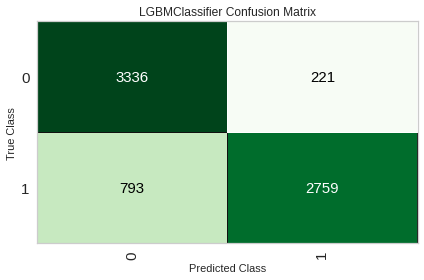

In [ ]:
#confusion matrix of auto-tuned model
plot_model(tuned_lgbm, plot = 'confusion_matrix')

From the confusion matrix, we can see that the `base model` has the lowest false-negative which is good for this business case 

### Class Report

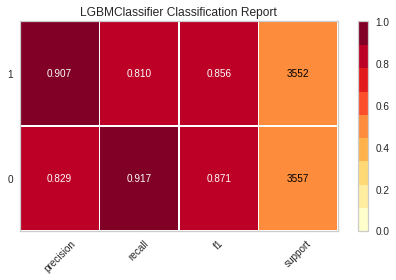

In [ ]:
#class report of base model
plot_model(lgbm, plot = 'class_report')

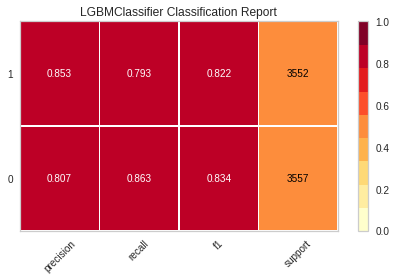

In [ ]:
#class report of my-tuned model
plot_model(my_lgbm, plot = 'class_report')

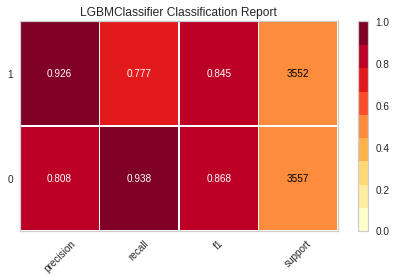

In [ ]:
#class report of auto-tuned model
plot_model(tuned_lgbm, plot = 'class_report')

From 3 evaluation metrics above, i'll choose the base model

### Feature importance

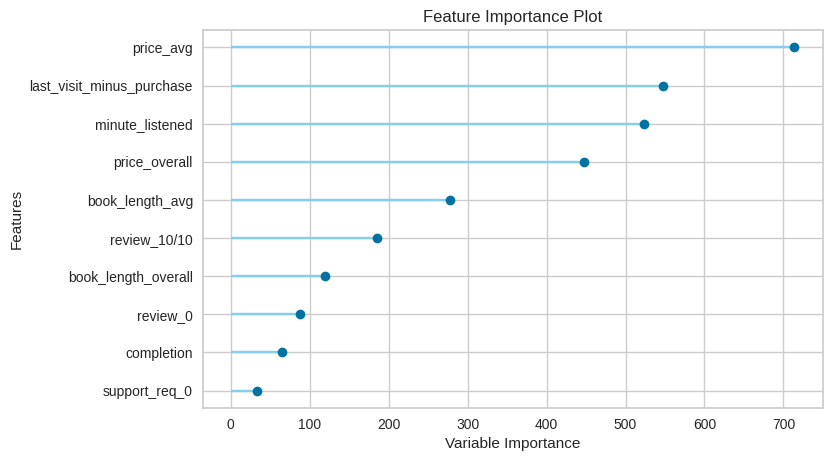

In [ ]:
#plot feature importance
plot_model(lgbm, plot = 'feature')

The feature importance seems well-distributed along the features

## Saving Model

In [ ]:
#saving best model
save_model(lgbm, '/content/drive/MyDrive/Course_Data/lightgbm_conversion')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20,